<a href="https://colab.research.google.com/github/roehrs/Bootcamp_programador_python_IGTI/blob/main/algoritmo_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importando as bibliotecas 
from sklearn import neighbors, datasets
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split   # função que realiza a divisão do dataset
from sklearn.preprocessing import MinMaxScaler # função para normalização do dataset
from sklearn.neighbors import KNeighborsClassifier # importando os vizinhos
from sklearn.metrics import classification_report, confusion_matrix #importação para construção de matrix 
from mlxtend.plotting import plot_confusion_matrix # importação para plot de matrix confusão
import matplotlib.pyplot as plt

In [ ]:
#importando csv 
df_diabetes = pd.read_csv('datasets_diabetes.csv')

In [ ]:
cont = df_diabetes['Outcome'] == 1 
df_diabetes[cont]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [ ]:
#transforma os dados em array
entradas = df_diabetes.iloc[:, :-1].values  #dados de entrada
saida = df_diabetes.iloc[:, 8].values  # saídas ou target

In [ ]:
# realiza o processo de normalização dos dados
normaliza = MinMaxScaler() #objeto para a normalização
entradas_normalizadas=normaliza.fit_transform(entradas)

In [ ]:
# realiza a visisão dos dados entre treinamento e teste 
X_train, X_test, y_train, y_test = train_test_split(entradas_normalizadas, saida, 
                                                    test_size=0.30,random_state=42)

print(y_test.shape)

(231,)


In [ ]:
#treinando o modelo 
classifier = KNeighborsClassifier(n_neighbors=5) #utiliza a construção por meio de 5 vizinhos
classifier.fit(X_train, y_train) # aplica a classificação

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
#realiza a previsão
y_pred = classifier.predict(X_test)

In [ ]:
#constroi a matriz de confusão para comparar o modelo criado
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[118  33]
 [ 41  39]]
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       151
           1       0.54      0.49      0.51        80

    accuracy                           0.68       231
   macro avg       0.64      0.63      0.64       231
weighted avg       0.67      0.68      0.68       231



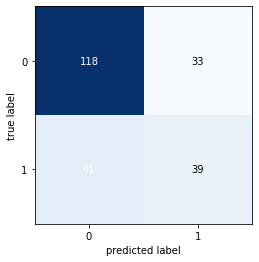

In [ ]:
#realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()